##### Kernel Density

In [1]:
import pandas as pd
from sklearn.neighbors import KernelDensity
from scipy.stats import gaussian_kde
from statsmodels.nonparametric.kde import KDEUnivariate
from statsmodels.nonparametric.kernel_density import KDEMultivariate

In [2]:
df = pd.read_csv('DCOILBRENTEU.csv')

In [3]:
df.head()

,observation_date,DCOILBRENTEU
0,05/08/13,103.79
1,05/09/13,103.59
2,05/10/13,101.31
3,05/13/13,102.17
4,05/14/13,102.70


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1273 entries, 0 to 1272
Data columns (total 2 columns):
observation_date    1273 non-null object
DCOILBRENTEU        1273 non-null float64
dtypes: float64(1), object(1)
memory usage: 20.0+ KB


In [5]:
df.isnull().sum()

observation_date    0
DCOILBRENTEU        0
dtype: int64

In [6]:
df.dropna()

,observation_date,DCOILBRENTEU
0,05/08/13,103.79
1,05/09/13,103.59
2,05/10/13,101.31
3,05/13/13,102.17
4,05/14/13,102.70
5,05/15/13,101.57
6,05/16/13,104.27
7,05/17/13,103.83
8,05/20/13,104.55
9,05/21/13,103.10


In [7]:
df.isnull().sum()

observation_date    0
DCOILBRENTEU        0
dtype: int64

In [8]:
df.describe()

,DCOILBRENTEU
count,1273.000000
mean,68.605232
std,26.099789
min,26.010000
25%,48.180000
50%,57.720000
75%,101.150000
max,117.150000


In [9]:
df.describe()

,DCOILBRENTEU
count,1273.000000
mean,68.605232
std,26.099789
min,26.010000
25%,48.180000
50%,57.720000
75%,101.150000
max,117.150000


In [10]:
from sklearn.neighbors import KernelDensity
from scipy.stats import gaussian_kde
from statsmodels.nonparametric.kde import KDEUnivariate
from statsmodels.nonparametric.kernel_density import KDEMultivariate

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [12]:
#seaborn settings
sns.set_palette("deep", desat=.6)
sns.set_context(rc={"figure.figsize": (8,4)})

Text(0,0.5,'Time Period')

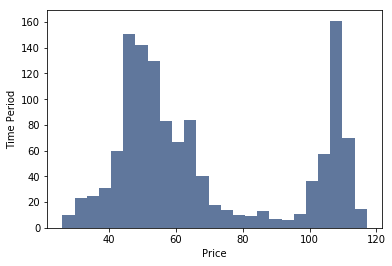

In [13]:
plt.hist(df.DCOILBRENTEU.dropna(),bins=25)
plt.xlabel('Price')
plt.ylabel('Time Period')

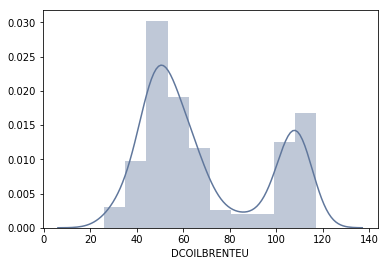

In [14]:
sns.distplot(df.DCOILBRENTEU.dropna())

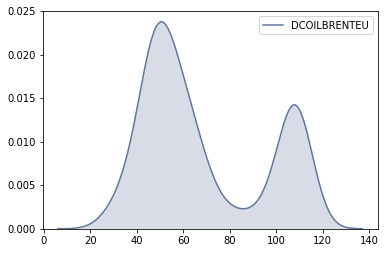

In [15]:
sns.kdeplot(df.DCOILBRENTEU.dropna(), shade=True)

In [16]:
from sklearn.neighbors import KernelDensity
from scipy.stats import gaussian_kde
from statsmodels.nonparametric.kde import KDEUnivariate
from statsmodels.nonparametric.kernel_density import KDEMultivariate


def kde_scipy(x, x_grid, bandwidth=0.2, **kwargs):
    """Kernel Density Estimation with Scipy"""
    # Note that scipy weights its bandwidth by the covariance of the
    # input data.  To make the results comparable to the other methods,
    # we divide the bandwidth by the sample standard deviation here.
    kde = gaussian_kde(x, bw_method=bandwidth / x.std(ddof=1), **kwargs)
    return kde.evaluate(x_grid)


def kde_statsmodels_u(x, x_grid, bandwidth=0.2, **kwargs):
    """Univariate Kernel Density Estimation with Statsmodels"""
    kde = KDEUnivariate(x)
    kde.fit(bw=bandwidth, **kwargs)
    return kde.evaluate(x_grid)
    
    
def kde_statsmodels_m(x, x_grid, bandwidth=0.2, **kwargs):
    """Multivariate Kernel Density Estimation with Statsmodels"""
    kde = KDEMultivariate(x, bw=bandwidth * np.ones_like(x),
                          var_type='c', **kwargs)
    return kde.pdf(x_grid)


def kde_sklearn(x, x_grid, bandwidth=0.2, **kwargs):
    """Kernel Density Estimation with Scikit-learn"""
    kde_skl = KernelDensity(bandwidth=bandwidth, **kwargs)
    kde_skl.fit(x[:, np.newaxis])
    # score_samples() returns the log-likelihood of the samples
    log_pdf = kde_skl.score_samples(x_grid[:, np.newaxis])
    return np.exp(log_pdf)